In [14]:
# EJERCICIO 1

In [31]:
# 1. Check if your country is a polygon or multipolygon.

In [62]:
import os


import geopandas as gpd
from  fiona import listlayers

#mapa
canadamaps='maps/canadaMaps.gpkg'

#layers in maps
listlayers(canadamaps)

['countries', 'cities', 'rivers']

In [63]:
canada=gpd.read_file(canadamaps,layer='countries')
canada_cities=gpd.read_file(canadamaps,layer='cities')
canada_rivers=gpd.read_file(canadamaps,layer='rivers')

In [64]:
canada

,COUNTRY,geometry
0,Canada,"MULTIPOLYGON (((385323.172 23951253.091, 38663..."


In [65]:
# 2. Recover just the boundaries of that country.

<Axes: >

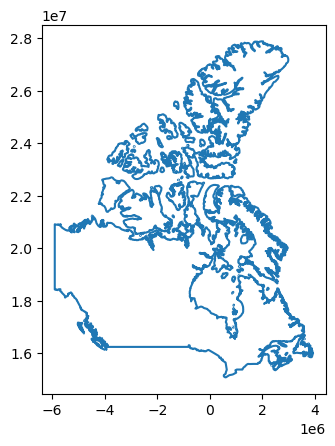

In [66]:
canada.boundary.plot()

In [67]:
# 3. Turn the boundary into a GDF

In [68]:
type(canada.boundary)

geopandas.geoseries.GeoSeries

In [69]:
canada.boundary.to_frame()

,0
0,"MULTILINESTRING ((385323.172 23951253.091, 386..."


In [86]:
# conversion
canada_border=canada.boundary.to_frame() 

# new column (optional)
canada_border['name']='Canada' 

# renaming the geometry column
canada_border.rename(columns={0:'geometry'},inplace=True) 

#setting the geometry (the name is not enough)
canada_border = canada_border.set_geometry("geometry")

# verifying:

new_crs = "EPSG:3978"
# Cambia el CRS del GeoDataFrame
canada = canada.to_crs(new_crs)
canada_cities = canada_cities.to_crs(new_crs)
canada_rivers = canada_rivers.to_crs(new_crs)

# Ahora, gdf tiene el nuevo CRS
canada_border.crs

<Projected CRS: EPSG:5641>
Name: SIRGAS 2000 / Brazil Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Brazil - offshore - equatorial margin.
- bounds: (-51.64, -5.74, -32.43, 7.04)
Coordinate Operation:
- name: Petrobras Mercator
- method: Mercator (variant B)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [87]:
canada_border

,geometry,name
0,"MULTILINESTRING ((385323.172 23951253.091, 386...",Canada


In [88]:
# EJERCICIO 2

In [89]:
# 1. Look for sub administrative divisions of your country
# 2. Check all the CRSs of those divisions
# 3. If you find one CRS is missing, fill the CRS with the right projection.

In [90]:
canada.crs.to_epsg()==canada_cities.crs.to_epsg()==canada_rivers.crs.to_epsg()

True

In [91]:
canada.crs

<Projected CRS: EPSG:3978>
Name: NAD83 / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [108]:
canada_cities.crs

,NAME,COUNTRY,CAPITAL,geometry
0,Calgary,Canada,N,POINT (-1306808.946 422114.861)
1,Winnipeg,Canada,N,POINT (-152005.167 104810.549)
2,Quebec,Canada,N,POINT (1787634.349 92278.152)
3,Montreal,Canada,N,POINT (1660362.535 -106061.587)
4,Ottawa,Canada,Y,POINT (1515735.936 -173797.957)
5,Toronto,Canada,N,POINT (1273163.813 -436705.245)
6,Saskatoon,Canada,N,POINT (-783704.710 415852.738)
7,Regina,Canada,N,POINT (-679763.586 208073.253)
8,Moosonee,Canada,N,POINT (978013.441 368228.347)
9,Schefferville,Canada,N,POINT (1707636.977 1027416.641)


In [93]:
canada_rivers.crs

<Projected CRS: EPSG:3978>
Name: NAD83 / Canada Atlas Lambert
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada Atlas Lambert
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [94]:
# EJERCICIO 3

# 1. Look for some points in a CSV file about your country.

# 2. Turn those points into a spatial object.

# 3. Save the layer.

In [95]:
import pandas as pd
import os

info_a= pd.read_csv(os.path.join("data", "canada_a2.csv"), encoding='latin1')
info_a

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,1990,CYYZ,large_airport,Toronto Lester B. Pearson International Airport,43.6772,-79.6306,569,NaN,Canada,CA,...,Toronto,1,CYYZ,YYZ,YYZ,http://www.gtaa.com/,https://en.wikipedia.org/wiki/Toronto_Pearson_...,"YTO, Toronto International Airport, Malton",1040275,2023-05-11T14:58:13+00:00
2,1941,CYVR,large_airport,Vancouver International Airport,49.193901062,-123.183998108,14,NaN,Canada,CA,...,Vancouver,1,CYVR,YVR,NaN,http://www.yvr.ca/,https://en.wikipedia.org/wiki/Vancouver_Intern...,NaN,1018875,2013-07-22T11:09:16+00:00
3,1928,CYUL,large_airport,Montreal / Pierre Elliott Trudeau Internationa...,45.4706001282,-73.7407989502,118,NaN,Canada,CA,...,MontrÃ©al,1,CYUL,YUL,YUL,http://www.admtl.com/passager/Home.aspx,https://en.wikipedia.org/wiki/Montr%C3%A9al-Pi...,"YMQ, Dorval Airport",51875,2014-03-16T22:14:44+00:00
4,1973,CYYC,large_airport,Calgary International Airport,51.113899231,-114.019996643,3557,NaN,Canada,CA,...,Calgary,1,CYYC,YYC,NaN,http://www.calgaryairport.com/,https://en.wikipedia.org/wiki/Calgary_Internat...,McCall Field,51275,2014-03-18T23:08:53+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,509083,CA-0872,closed,Cow Creek Airport,42.98434,-82.20114,643,NaN,Canada,CA,...,Wyoming,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2023-05-25T03:06:48+00:00
3077,320714,CA-0659,closed,Yahk Aerodrome,49.109,-116.0598,2870,NaN,Canada,CA,...,Yahk,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-11-23T12:47:24+00:00
3078,39705,CA-0059,closed,Brazeau Airport,52.967817,-115.86737,NaN,NaN,Canada,CA,...,Yellowhead,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-02-18T17:19:40+00:00
3079,40067,CA-0421,closed,E C Air Airport,51.53614,-111.19324,NaN,NaN,Canada,CA,...,Youngstown,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-12-03T06:44:57+00:00


In [96]:
# bye first row 
info_a.drop(index=0,inplace=True)
info_a.reset_index(drop=True, inplace=True)

# keep the  columns needed
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
info_a=info_a.loc[:,keep]
info_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3080 non-null   object
 1   type           3080 non-null   object
 2   latitude_deg   3080 non-null   object
 3   longitude_deg  3080 non-null   object
 4   elevation_ft   2561 non-null   object
 5   region_name    3080 non-null   object
 6   municipality   2514 non-null   object
dtypes: object(7)
memory usage: 168.6+ KB


In [97]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
info_a[numericCols]=info_a.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now 
info_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3080 non-null   object 
 1   type           3080 non-null   object 
 2   latitude_deg   3080 non-null   float64
 3   longitude_deg  3080 non-null   float64
 4   elevation_ft   2561 non-null   float64
 5   region_name    3080 non-null   object 
 6   municipality   2514 non-null   object 
dtypes: float64(3), object(4)
memory usage: 168.6+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

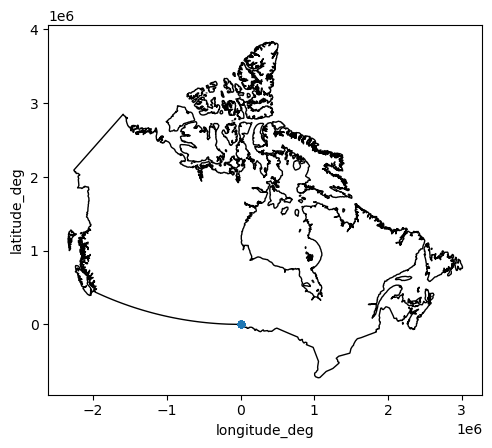

In [98]:
# let's plot

base = canada.plot(color='white', edgecolor='black') #unprojected

info_a.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [99]:
a=gpd.GeoDataFrame(data=info_a.copy(),
                 geometry=gpd.points_from_xy(info_a.longitude_deg,
                                             info_a.latitude_deg), 
                 crs=3978)# the coordinates were in degrees - unprojected

In [100]:
a = a.to_crs(3978)

<Axes: >

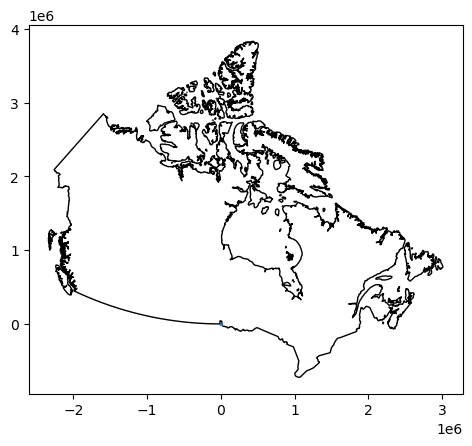

In [102]:
# let's plot

base = canada.plot(color='white', edgecolor='black')
a.plot(ax=base,markersize=1)

In [103]:
# EJERCICIO 4

# Compute the centroid of your country.

# Combine all the polygons to the north, and also all the polygons to the south; use unary union.

# Detect the amount of duplicates after the combination.

# Plot both maps so that duplicates appear.

In [104]:
centroCanada=canada.centroid
centroCanada

0    POINT (-60310.404 1250285.721)
dtype: geometry

In [ ]:
canada_states=gpd.read_file(os.path.join("maps","bra_adm_ibge_2020_shp","bra_admbnda_adm1_ibge_2020.shp"))


NameError: name 'canada_m' is not defined

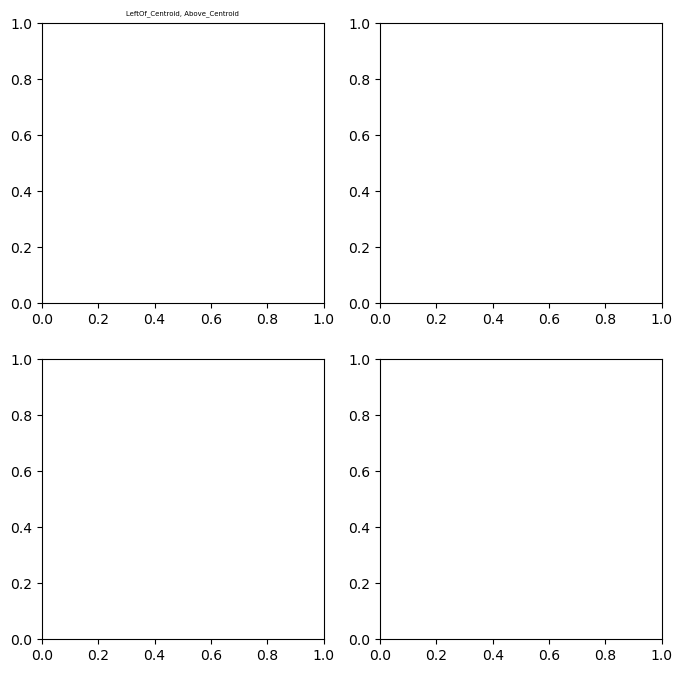

In [107]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2,ncols=2,sharex=False, sharey=False,figsize=(8,8))

centroidX=centroCanada.x[0]
centroidY=centroCanada.y[0]

axs[0,0].set_title('LeftOf_Centroid, Above_Centroid',fontsize=5)
canada_m.cx[:centroidX,centroidY:].plot(ax=axs[0,0]) 

axs[0,1].set_title('RightOf_Centroid, Above_Centroid',fontsize=5)
canada_m.cx[centroidX:,centroidY:].plot(ax=axs[0,1]) 

axs[1,0].set_title('LeftOf_Centroid, Below_Centroid',fontsize=5)
canada_m.cx[:centroidX,:centroidY].plot(ax=axs[1,0]) 

axs[1,1].set_title('RightOf_Centroid, Below_Centroid',fontsize=5)
canada_m.cx[centroidX:,:centroidY].plot(ax=axs[1,1]) ;